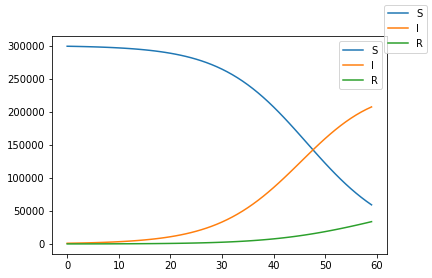

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def dS(S, I):	#s - численность восприимчивого к вирусу населения
    return -beta*S*I/N
def dI(S, I):	#I - количество инфицированных
    return beta*S*I/N - gamma*I
def dR(I):		#R - общее количество выздоровевших и умерших людей
    return gamma*I
n = 60          #количество рассматриваемых дней
S = np.zeros(n)
I = np.zeros(n)
R = np.zeros(n)
beta = 0.13
gamma = 0.009
N = 300000   	 #население населенного пункта
S[0] = N-1000	  #количество здоровых, но подверженных заражению людей
I[0] = 1000  #количество заболевших на момент начала рассматриваемого прериода
R[0] = 0      #количество выздоровевшихся и умерших
h = 60 / n    #шаг
k1 = k2 = k3 = k4 = q1 =q2 = q3 = q4 = 0.0
p1 = p2 = p3 = p4 = 0.0
for i in range(1, n):
    k1 = dS(S[i-1], I[i-1])
    q1 = dI(S[i-1], I[i-1])
    p1 = dR(I[i-1])
    k2 = dS(S[i-1] + k1/2, I[i-1] + q1/2)
    q2 = dI(S[i-1] + k1/2, I[i-1] + q1/2)
    p2 = dR(I[i-1] + q1/2)
    k3 = dS(S[i-1] + k2/2, I[i-1] + q2/2)
    q3 = dI(S[i-1] + k2/2, I[i-1] + q2/2)
    p3 = dR(I[i-1] + q2/2)
    k4 = dS(S[i-1] + k3, I[i-1] + q3)
    q4 = dI(S[i-1] + k3, I[i-1] + q3)
    p4 = dR(I[i-1] + q3)
    S[i] = S[i-1] + (h/6.) * (k1 + 2 * k2 + 2 * k3 + k4)
    I[i] = I[i-1] + (h/6.) * (q1 + 2 * q2 + 2 * q3 + q4)  
    R[i] = R[i-1] + (h/6.) * (p1 + 2 * p2 + 2 * p3 + p4)
fig, ax = plt.subplots()
plt.plot(S,label='S')
plt.plot(I,label='I')
plt.plot(R,label='R')
ax.legend()
fig.legend()
plt.show()
